In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань

# data
данные обновлены 29.11.2023
- t  - температура
- p  - давление
- cloud - облачность
- precip - осадки/гроза
- wdir - направление ветра
- ws - скорость ветра 
<br> метка **d** в конце названия столбца указывает что данные **дневные**
<br> метка **n** в конце названия столбца указывает что данные **ночные**

In [2]:
data = pd.read_csv('data.csv', index_col='id')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     8912 non-null   int64  
 1   month    8912 non-null   int64  
 2   day      8912 non-null   int64  
 3   td       8897 non-null   float64
 4   pd       8897 non-null   float64
 5   cloudd   8897 non-null   object 
 6   precipd  1342 non-null   object 
 7   wdird    8897 non-null   object 
 8   wsd      8897 non-null   float64
 9   tn       8884 non-null   float64
 10  pn       8884 non-null   float64
 11  cloudn   8884 non-null   object 
 12  precipn  1189 non-null   object 
 13  wdirn    8884 non-null   object 
 14  wsn      8884 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 1.1+ MB


###### словари для меток облачности и осадков

In [3]:
clouds = {'dull':'пасмурно', 'suncl':'облачно', 'sunc':'малооблачно','sun':'ясно'}
precipitation = {'rain':'дождь', 'snow': 'снег', 'storm': 'гроза'}

###### словари для меток месяцев и сезонов

In [4]:
dictmonth = {1: {'a': 'Ян', 'f': 'Январь'}, 
             2: {'a': 'Фе', 'f': 'Февраль'}, 
             3: {'a': 'Март', 'f': 'Март'},
             4: {'a': 'Ап', 'f': 'Апрель'},
             5: {'a': 'Май', 'f': 'Май'},
             6: {'a': 'Июнь', 'f': 'Июнь'},
             7: {'a': 'Июль', 'f': 'Июль'},
             8: {'a': 'Ав', 'f': 'Август'},
             9: {'a': 'Се', 'f': 'Сентябрь'}, 
            10: {'a': 'Ок', 'f': 'Октябрь'},
            11: {'a': 'Но', 'f': 'Ноябрь'},
            12: {'a': 'Де', 'f': 'Декабрь'}}
seasons = ['зима', 'весна', 'лето', 'осень']

# 4. Температура

### средняя и медианная температура

In [5]:
tmean = data[['td', 'tn']].mean().round(2)
tmedian = data[['td', 'tn']].median().round(2)
print('средняя температура в Рязани: ', tmean.mean(),'\u2103', sep='')
print('среднея температура днем составляет: ', tmean.loc['td'], '\u2103,', 
      ' медианная дневная температура : ', tmedian.loc['td'],
     '\nсреднея температура ночью составляет: ', tmean.loc['tn'], '\u2103,',
     ' медианная ночная температура : ', tmedian.loc['tn'], sep='')

средняя температура в Рязани: 7.56℃
среднея температура днем составляет: 9.27℃, медианная дневная температура : 9.0
среднея температура ночью составляет: 5.85℃, медианная ночная температура : 6.0


### максимальная и минимальная температура

In [6]:
tmax = data[['td', 'tn']].max()
tmin = data[['td', 'tn']].min()
print('максимальная температура днем: ', tmax['td'], '\u2103, ночью: ', tmax['tn'], '\u2103',
      '\nминимальная температура днем: ', tmin['td'], '\u2103, ночью: ', tmin['tn'], '\u2103', sep='')

максимальная температура днем: 39.0℃, ночью: 33.0℃
минимальная температура днем: -29.0℃, ночью: -31.0℃


##### даты максимальных температур

In [7]:
tmaxdaydate = data[data['td'] == tmax['td']].index
print('максимальная температура днем была:', end=' ')
[print(f'{data.loc[i].day}.{data.loc[i].month}.{data.loc[i].year}', sep='', end=' ') for i in tmaxdaydate]
tmaxnightdate = data[data['tn'] == tmax['tn']].index
print('\nмаксимальная температура ночью была:', end=' ')
[print(f'{data.loc[i].day}.{data.loc[i].month}.{data.loc[i].year}', sep='', end=' ') for i in tmaxnightdate];

максимальная температура днем была: 29.7.2010 4.8.2010 6.8.2010 
максимальная температура ночью была: 28.7.2010 

##### даты минимальных температур

In [8]:
tmindaydate = data[data['td'] == tmin['td']].index
print('минимальная температура днем была:', end=' ')
[print(f'{data.loc[i].day}.{data.loc[i].month}.{data.loc[i].year}', sep='', end=' ') for i in tmindaydate]
tminnightdate = data[data['tn'] == tmin['tn']].index
print('\nминимальная температура ночью была:', end=' ')
[print(f'{data.loc[i].day}.{data.loc[i].month}.{data.loc[i].year}', end=' ') for i in tminnightdate];

минимальная температура днем была: 18.1.2006 
минимальная температура ночью была: 18.1.2006 

### 4.1 Средняя температура по годам

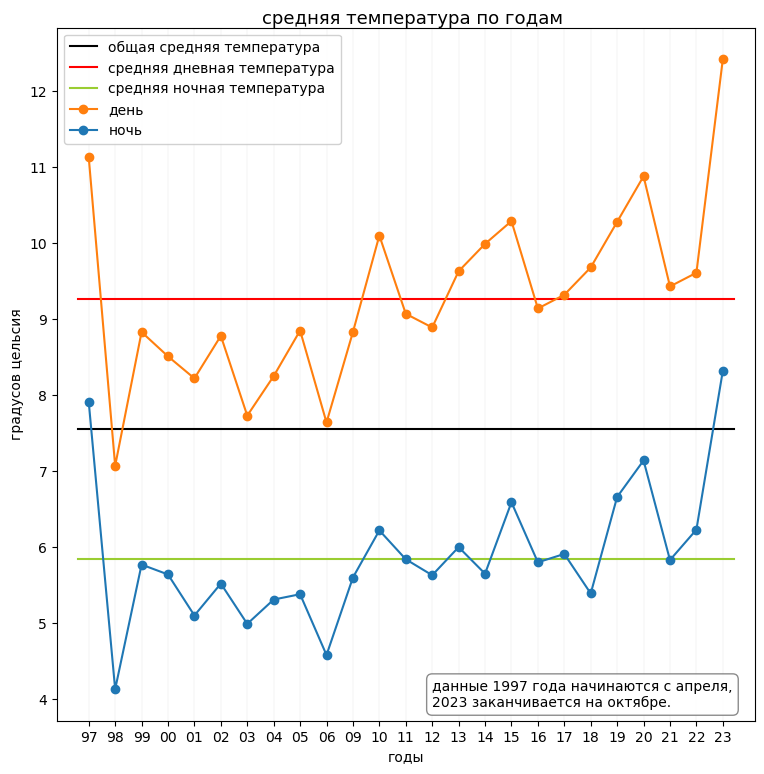

In [9]:
ytg = data.groupby(['year']).agg({'td': np.mean, 'tn': np.mean}).round(2)
fig19 = plt.figure(figsize=(9, 9))
fig19.suptitle('средняя температура по годам',x=0.52,y=0.90, fontsize=13)
ax_ytg = fig19.add_subplot()
ax_ytg.axhline(y=tmean.mean(), xmin=0.03, xmax=0.97, label='общая средняя температура', color='black')
ax_ytg.axhline(y=tmean['td'], xmin=0.03, xmax=0.97, label='средняя дневная температура', color='red')
ax_ytg.axhline(y=tmean['tn'], xmin=0.03, xmax=0.97, label='средняя ночная температура', color='YellowGreen')
ax_ytg.plot(np.arange(len(ytg.index)), ytg['td'], color='#ff7f0e', label='день', marker='o')
ax_ytg.plot(np.arange(len(ytg.index)), ytg['tn'], color='#1f77b4', label='ночь', marker='o')
ax_ytg.xaxis.set_major_locator(FixedLocator(np.arange(len(ytg.index))))
ax_ytg.xaxis.set_major_formatter(FixedFormatter([str(i)[2:] for i in ytg.index]))
ax_ytg.yaxis.set_major_locator(MaxNLocator(10))
ax_ytg.set_xlabel('годы')
ax_ytg.set_ylabel('градусов цельсия')
ax_ytg.text(x=13, y=3.90, s='данные 1997 года начинаются с апреля,\n2023 заканчивается на октябре.', 
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4', alpha=0.9))
ax_ytg.legend(loc=2, framealpha=0.9)
plt.grid(axis='x', linewidth=0.1);

### 4.2 Средняя температура по месяцам

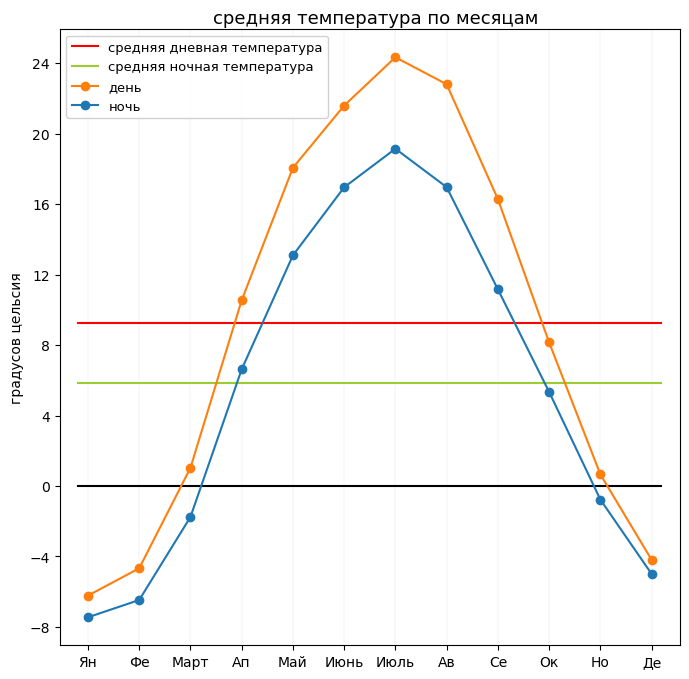

In [10]:
mtg = data.groupby('month').agg({'td':np.mean, 'tn': np.mean}).round(2)
fig20 = plt.figure(figsize=(8, 8))
fig20.suptitle('средняя температура по месяцам',x=0.52,y=0.905, fontsize=13)
ax_mtg = fig20.add_subplot()
ax_mtg.axhline(y=0, xmin=0.03, xmax=0.97, color='black')
ax_mtg.axhline(y=tmean['td'], xmin=0.03, xmax=0.97, label='средняя дневная температура', color='red')
ax_mtg.axhline(y=tmean['tn'], xmin=0.03, xmax=0.97, label='средняя ночная температура', color='YellowGreen')
ax_mtg.plot(np.arange(len(mtg.index)), mtg['td'], color='#ff7f0e', label='день', marker='o')
ax_mtg.plot(np.arange(len(mtg.index)), mtg['tn'], color='#1f77b4', label='ночь', marker='o')
ax_mtg.xaxis.set_major_locator(FixedLocator(np.arange(len(mtg.index))))
ax_mtg.xaxis.set_major_formatter(FixedFormatter([dictmonth[i]['a'] for i in mtg.index]))
ax_mtg.yaxis.set_major_locator(MaxNLocator(10))
ax_mtg.set_ylabel('градусов цельсия')
ax_mtg.legend(loc=2, framealpha=0.9, fontsize=9.45)
plt.grid(axis='x', linewidth=0.1);

### 4.3 Разница между дневной и ночной температурой

In [13]:
data['tdiff'] = data['td'] - data['tn']

In [14]:
print(f'''{data[data.tdiff<0].tdiff.count()} раз к ночи теплело. 
{data[data.tdiff>0].tdiff.count()} раз к ночи было холодней. 
{data[data.tdiff==0].tdiff.count()} раз температура не менялась.''')

589 раз к ночи теплело. 
7240 раз к ночи было холодней. 
1040 раз температура не менялась.


In [15]:
tdc = data.groupby('tdiff', as_index=False).agg(diffcount=('tdiff', 'count')).astype({'tdiff':'int'})

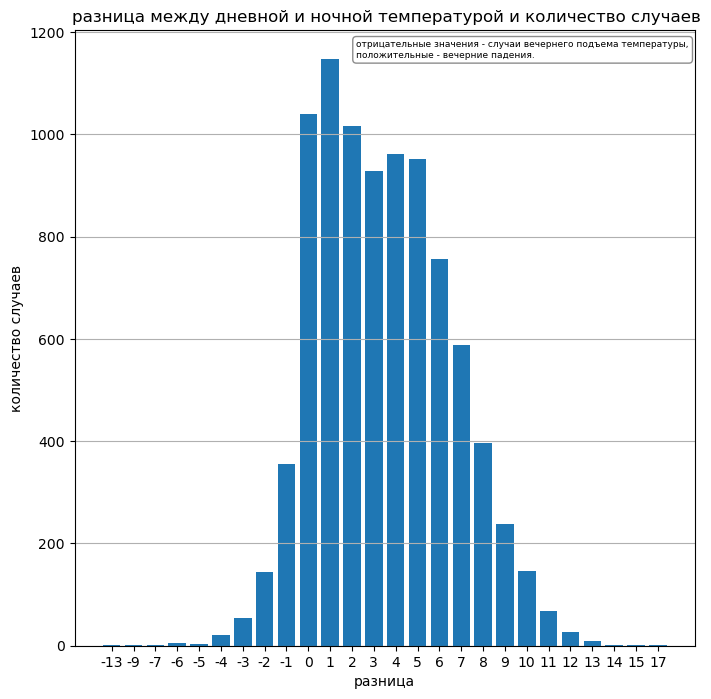

In [16]:
fig22 = plt.figure(figsize=(8, 8))
fig22.suptitle('разница между дневной и ночной температурой и количество случаев',x=0.515,y=0.905, fontsize=12)
ax_tdc = fig22.add_subplot()
ax_tdc.bar(np.arange(tdc.shape[0]), height=tdc['diffcount'])
ax_tdc.xaxis.set_major_locator(FixedLocator(np.arange(tdc.shape[0])))
ax_tdc.xaxis.set_major_formatter(FixedFormatter(tdc['tdiff']))
ax_tdc.set_ylabel('количество случаев')
ax_tdc.set_xlabel('разница')
ax_tdc.text(x=11.2, y=1150, s='отрицательные значения - случаи вечернего подъема температуры,\
\nположительные - вечерние падения.', 
bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4', alpha=0.9), fontsize=6.5)
ax_tdc.grid(axis='y');

### 4.4 Популярность температур

In [17]:
# подсчёт общего числа случаев каждой величины температуры
vtc = pd.DataFrame(pd.concat([data['td'], data['tn']], ignore_index=True)\
                     .value_counts().sort_index())\
                     .reset_index().rename(columns={'index': 'tval', 0: 'count'}).astype({'tval': 'str'})

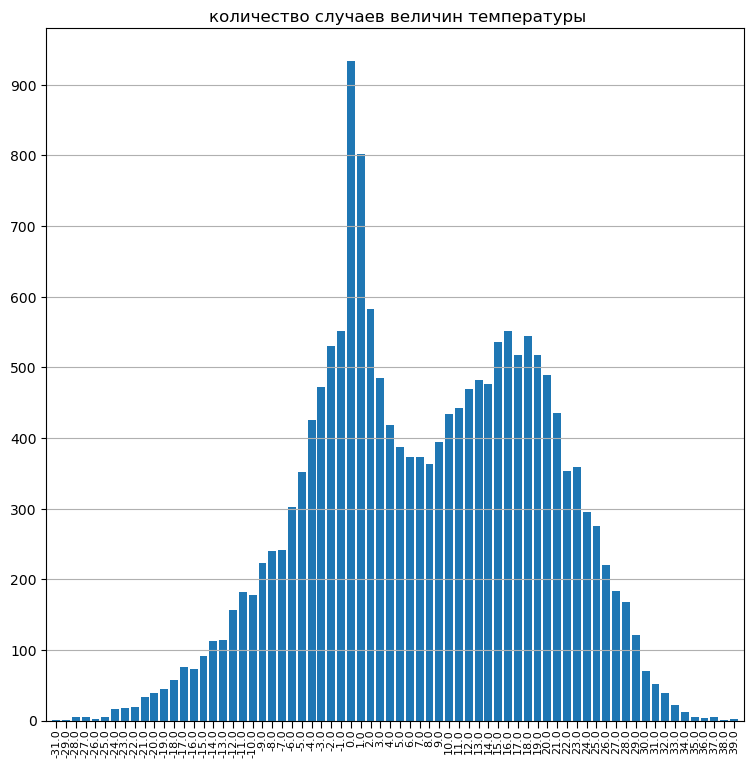

In [18]:
fig23 = plt.figure(figsize=(9, 9))
fig23.suptitle('количество случаев величин температуры',x=0.515,y=0.90, fontsize=12)
ax_vtc = fig23.add_subplot()
ax_vtc.bar(np.arange(vtc.shape[0]), height=vtc['count'])
ax_vtc.xaxis.set_major_locator(FixedLocator(vtc.index))
ax_vtc.xaxis.set_major_formatter(FixedFormatter(vtc['tval']))
ax_vtc.yaxis.set_major_locator(MaxNLocator(10))
ax_vtc.tick_params(axis ='x', rotation = 90, size=5, labelsize=8, pad=1)
ax_vtc.grid(axis='y')
plt.xlim(-1, 70);

### 4.5 рассеивание суточных показателей

In [19]:
# подсчёт количеств парных показателей температур
vct = data[['td', 'tn']].value_counts().reset_index().rename(columns={0:'count'})

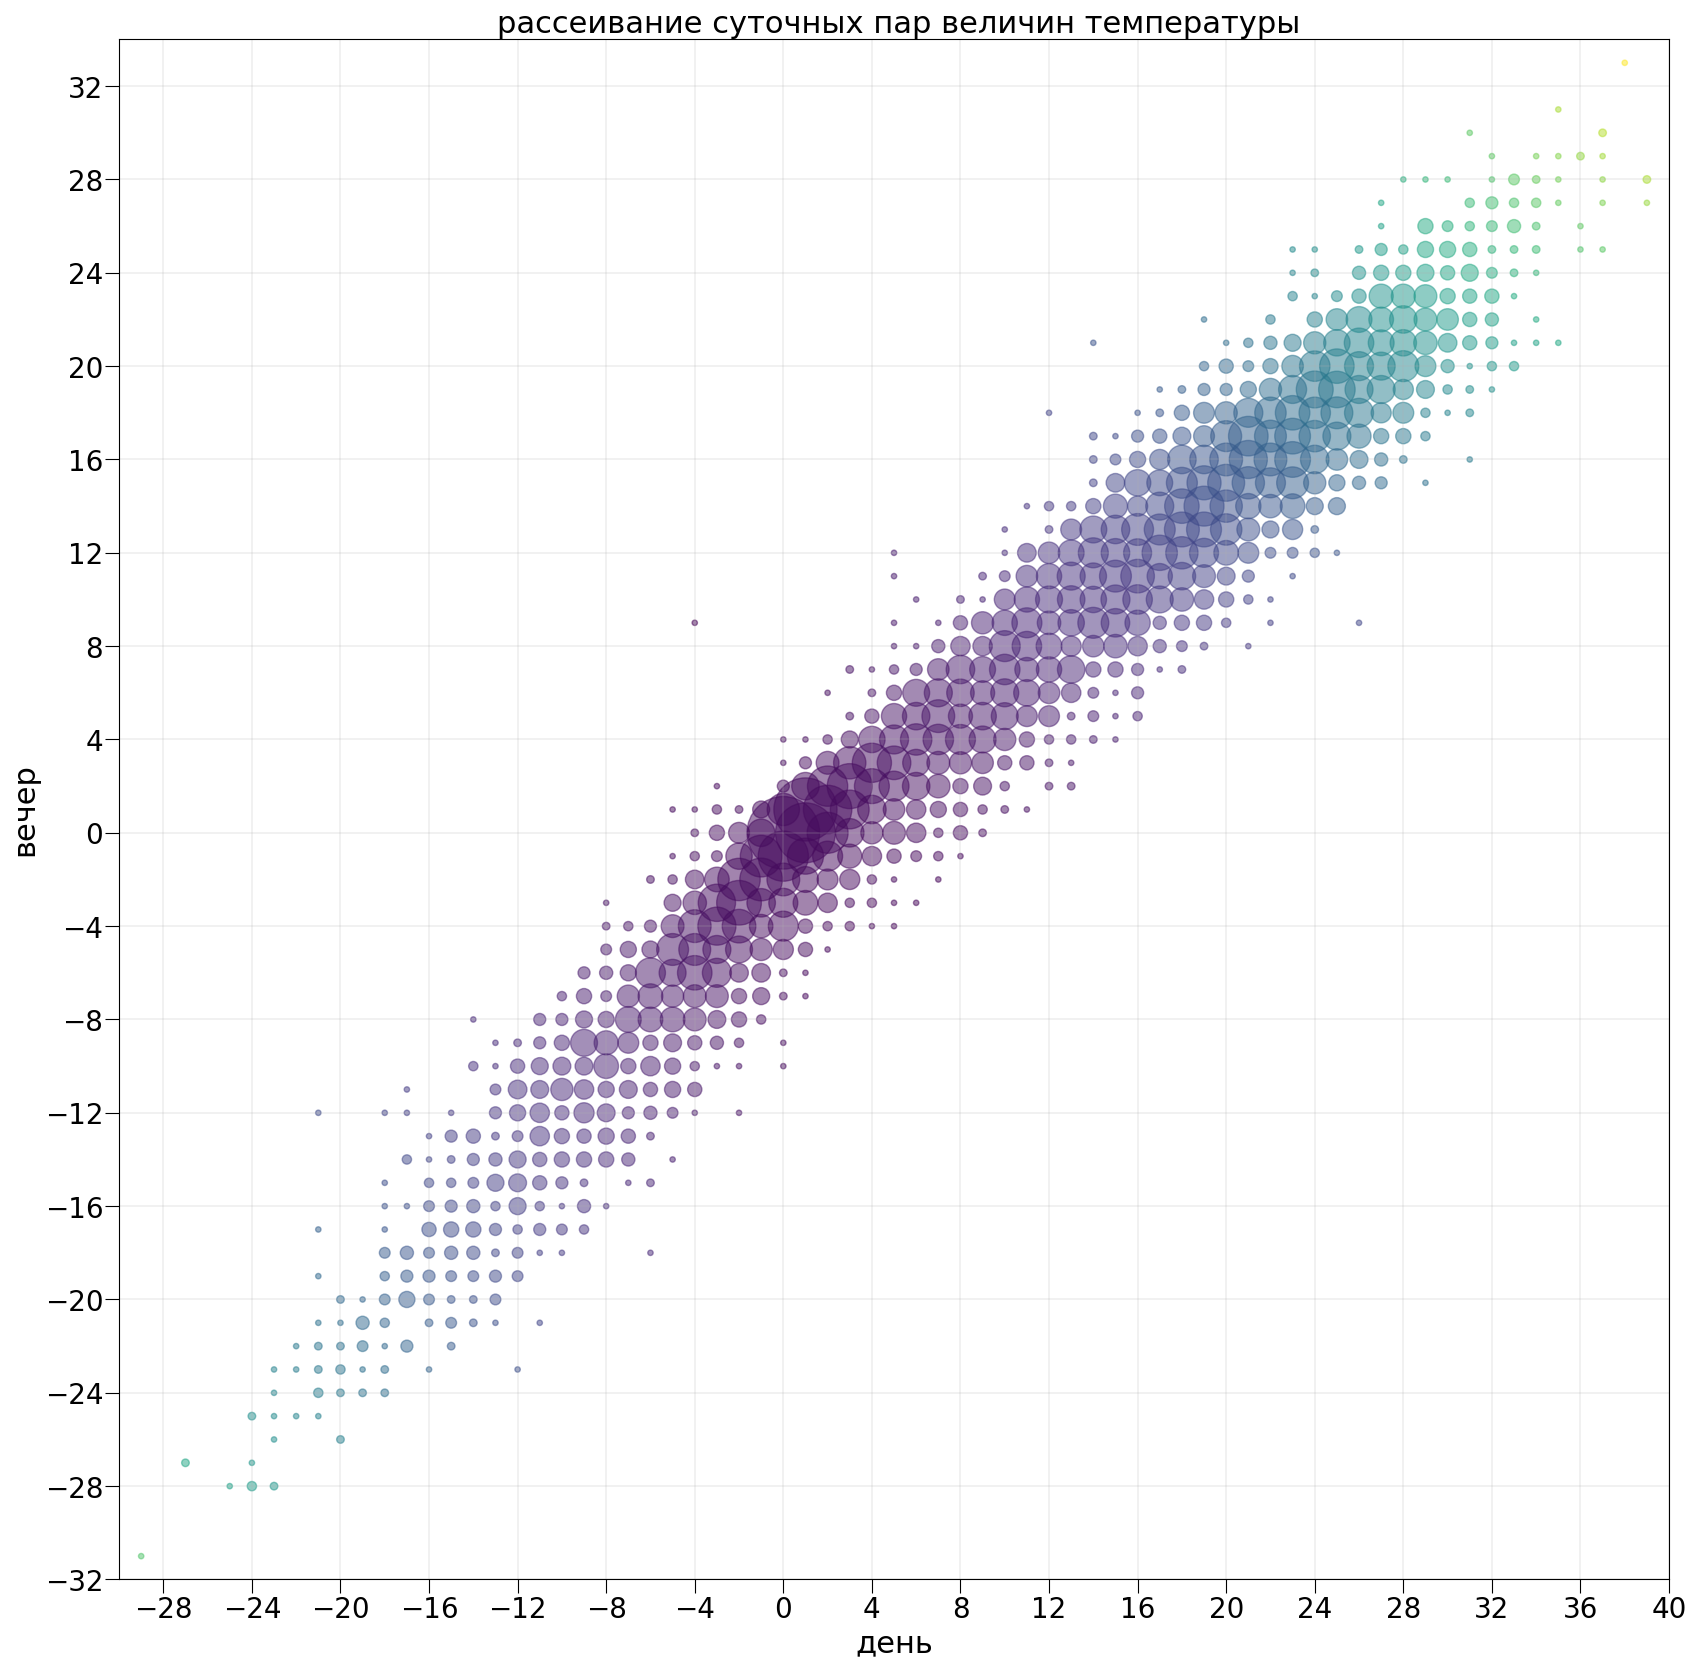

In [20]:
fig24 = plt.figure(figsize=(20, 20))
fig24.suptitle('рассеивание суточныx пар величин температуры',x=0.515,y=0.895, fontsize=22)
ax_vct = fig24.add_subplot()
ax_vct.scatter(vct['td'], vct['tn'], s=vct['count']*15, c=vct['td']*vct['tn'], alpha=0.5)
ax_vct.xaxis.set_major_locator(MaxNLocator(18))
ax_vct.yaxis.set_major_locator(MaxNLocator(18))
ax_vct.tick_params(axis ='both', size=10, labelsize=20, pad=1.5)
ax_vct.set_ylabel('вечер', fontsize=22)
ax_vct.set_xlabel('день', fontsize=22)
ax_vct.set(xlim=(vct['td'].min()-1, vct['td'].max()+1), ylim=(vct['tn'].min()-1, vct['tn'].max()+1))
ax_vct.grid(lw=0.25);

### 4.6 Зимний блок

#### 4.6.1 количество дней с положительной дневной температурой
в период с декабря по февраль

In [21]:
# дни с положительной температурой с декабря по февраль
winter_positive_t = data[(data.td > 0) 
                      & ((data.month < 3) | (data.month > 11)) 
                        & data.year.ne(1997) 
                        & data.year.ne(2023)].groupby('year', as_index=False).day.count()

In [22]:
# расчет накопительного среднего числа дней
sumday = 0
cummean = []
for i in winter_positive_t.index:
    sumday += winter_positive_t.loc[i].day
    cummean.append(np.round(sumday/(i+1), 2))
winter_positive_t['cummean'] = cummean

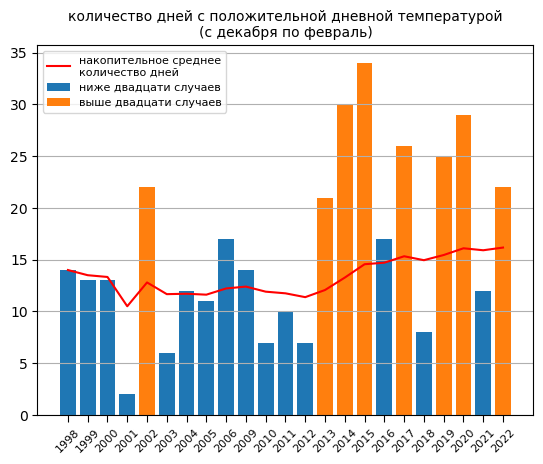

In [23]:
fig25_1 = plt.figure()
ax_wpt = fig25_1.add_subplot()
x = 0
for i in winter_positive_t.year:
    if winter_positive_t[winter_positive_t.year == i].day.values < 20:
        above = ax_wpt.bar(height=winter_positive_t[winter_positive_t.year == i].day, x=x, color='#1f77b4')
    elif winter_positive_t[winter_positive_t.year == i].day.values >= 20:
        below = ax_wpt.bar(height=winter_positive_t[winter_positive_t.year == i].day, x=x, color='#ff7f0e')
    x += 1    
ax_wpt.plot(np.arange(len(winter_positive_t.year)),winter_positive_t.cummean, c='r', label='накопительное среднее\nколичество дней')
ax_wpt.xaxis.set_major_locator(FixedLocator(np.arange(len(winter_positive_t.year))))
ax_wpt.xaxis.set_major_formatter(FixedFormatter(winter_positive_t.year))
ax_wpt.tick_params(axis ='x', rotation = 45, size=5, labelsize=8)
above.set_label('ниже двадцати случаев')
below.set_label('выше двадцати случаев')
ax_wpt.legend(loc=2, fontsize=8)
plt.title('количество дней с положительной дневной температурой\n(c декабря по февраль)', fontsize=10)
plt.grid(axis='y');

###### 4.6.2 средние температуры зимних месяцев

In [24]:
# отбор зимних месяцев и расчет их средней температуры
wintermean = data[((data.month < 3) | (data.month > 11))]\
             .groupby(['year', 'month'], as_index=False)\
             .agg({'td': 'mean'})

In [25]:
# массив с именами меток для оси Х
mon = wintermean.month.values
year = wintermean.year.values
axis_x = []
for i in range(len(mon)):
    if mon[i] == 1:
        axis_x.append(f'{year[i]}  {mon[i]}')
    else:
        axis_x.append(mon[i])
axis_x = np.array(axis_x)  

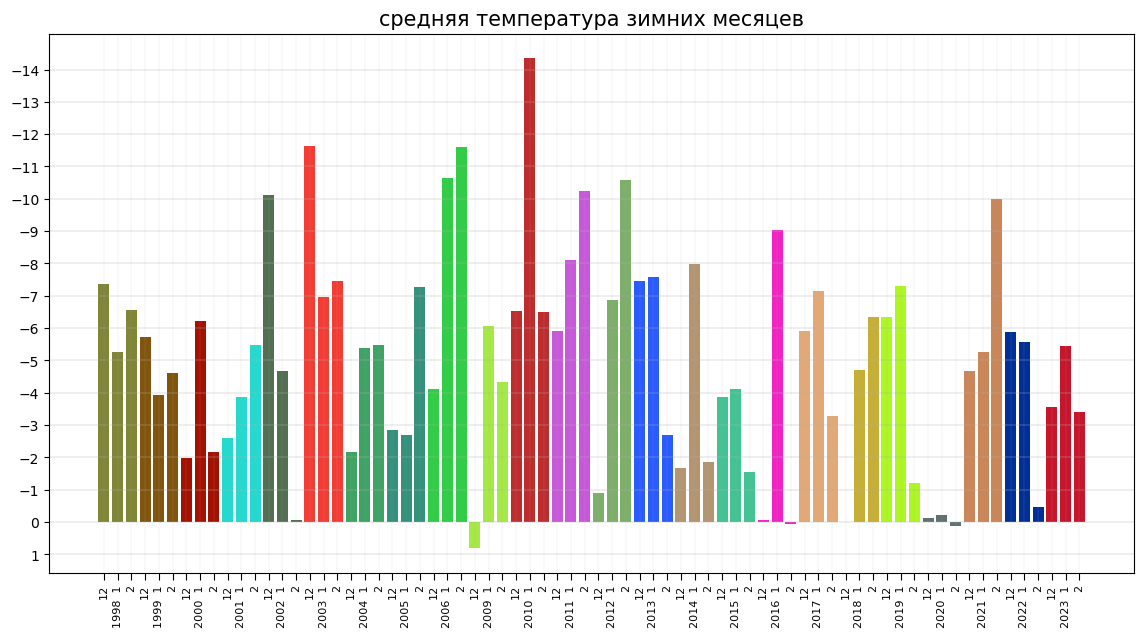

In [26]:
fig25_2 = plt.figure(figsize=(14, 7))
ax_wm = fig25_2.add_subplot()
x = np.array([0])
for i in wintermean.index:
    if wintermean.iloc[i].month == 12:
        color = (np.random.random (), np.random.random (), np.random.random ())
    ax_wm.bar(x, height=wintermean.iloc[i].td, color=color)
    x += 1
ax_wm.yaxis.set_major_locator(FixedLocator(np.arange(np.ceil(wintermean.td.min()), np.ceil(wintermean.td.max()+1))))
ax_wm.xaxis.set_major_locator(FixedLocator(np.arange(0, x.max())))
ax_wm.xaxis.set_major_formatter(FixedFormatter(axis_x))
ax_wm.tick_params(axis ='x', rotation = 90, size=5, labelsize=8)
plt.gca().invert_yaxis()
plt.grid(axis='y', linewidth=0.3)
plt.grid(axis='x', linewidth=0.1)
plt.title('средняя температура зимних месяцев', fontsize=15);

##### 4.6.3 переходы за ноль дневной зимней температуры

In [108]:
# формировать дата-фрейм по каждой зиме, для избежания ошибки в разнице температуры 28 февраля и 1 декабря
winter = pd.DataFrame()
years = np.unique(data.year.values)
for i in range(1, len(years)):
    dec = data[(data.year == years[i-1]) & (data.month == 12)].copy()
    janfeb = data[(data.year == years[i]) & (data.month < 3)].copy()
    one_winter = pd.concat([dec, janfeb], axis=0)
    one_winter['td_diff'] = one_winter.td.diff(1).values
    winter = pd.concat([winter, one_winter], axis=0)

In [109]:
# подсчитать переходы за ноль по годам
crossing_zero = winter.query("td >= 0 & td_diff > td").groupby('year').day.count()

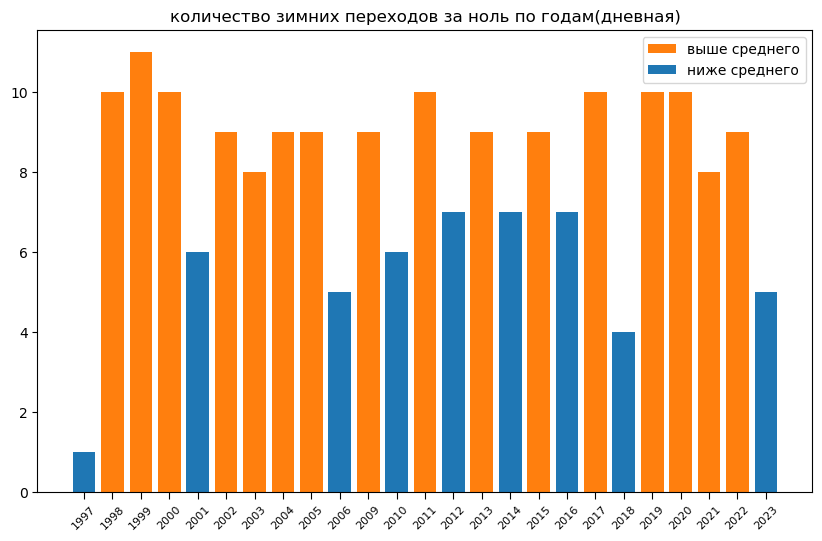

In [30]:
fig25_3 = plt.figure(figsize=(10, 6))
ax_cz = fig25_3.add_subplot()
x = 0
for i in crossing_zero.index:
    if crossing_zero.loc[i] < crossing_zero.mean():
        below = ax_cz.bar(x, height=crossing_zero.loc[i], color='#1f77b4')
    elif crossing_zero.loc[i] > crossing_zero.mean():
        above = ax_cz.bar(x, height=crossing_zero.loc[i], color='#ff7f0e')
    x += 1    
above.set_label('выше среднего')
below.set_label('ниже среднего')
ax_cz.xaxis.set_major_locator(FixedLocator(np.arange(len(crossing_zero.index))))
ax_cz.xaxis.set_major_formatter(FixedFormatter(crossing_zero.index))
ax_cz.tick_params(axis ='x', rotation = 45, size=5, labelsize=8)
ax_cz.legend()
plt.title('количество зимних переходов за ноль по годам(дневная)', fontsize=12);

###### 4.6.4 зимние переходы за ноль
день-ночь

In [110]:
# взять только даты и температуры
t = data[['year', 'month', 'day', 'td', 'tn']].copy()

In [111]:
# формировать массив с ночными и дневными температурами в длинну
all_t = pd.melt(t, id_vars=['year', 'month', 'day'], value_vars=['td','tn'], var_name='t', value_name='value')\
          .sort_values(['year', 'month', 'day', 't'])\
          .reset_index(drop=True)

In [112]:
# формировать дата-фрейм по каждой зиме, для избежания ошибки в разнице температуры 28 февраля и 1 декабря
all_t_winter = pd.DataFrame()
years = np.unique(all_t.year)
for i in range(1, len(years)):
    dec = all_t[(all_t.year == years[i-1]) & (all_t.month == 12)].copy()
    janfeb = all_t[(all_t.year == years[i]) & (all_t.month < 3)].copy()
    one_winter = pd.concat([dec, janfeb], axis=0)
    one_winter['td_diff'] = one_winter.value.diff(1).values
    all_t_winter = pd.concat([all_t_winter, one_winter], axis=0)

In [119]:
# подсчет переходов для каждого года
crossing_zero_dn = all_t_winter.query("value >= 0 & td_diff > value").groupby('year').day.count()

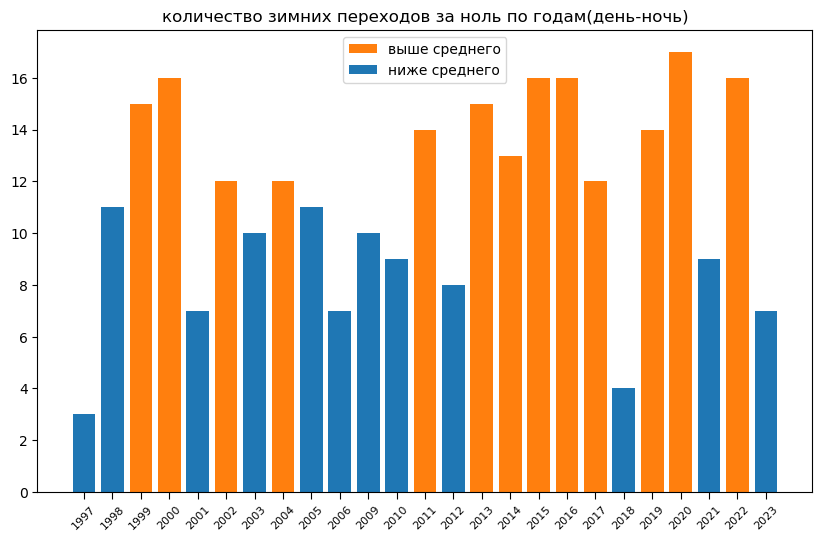

In [121]:
fig25_4 = plt.figure(figsize=(10, 6))
ax_cz_dn = fig25_4.add_subplot()
x = 0
for i in crossing_zero_dn.index:
    if crossing_zero_dn.loc[i] < crossing_zero_dn.mean():
        below = ax_cz_dn.bar(x, height=crossing_zero_dn.loc[i], color='#1f77b4')
    elif crossing_zero_dn.loc[i] > crossing_zero_dn.mean():
        above = ax_cz_dn.bar(x, height=crossing_zero_dn.loc[i], color='#ff7f0e')
    x += 1    
above.set_label('выше среднего')
below.set_label('ниже среднего')
ax_cz_dn.xaxis.set_major_locator(FixedLocator(np.arange(len(crossing_zero_dn.index))))
ax_cz_dn.xaxis.set_major_formatter(FixedFormatter(crossing_zero_dn.index))
ax_cz_dn.tick_params(axis ='x', rotation = 45, size=5, labelsize=8)
ax_cz_dn.legend()
plt.title('количество зимних переходов за ноль по годам(день-ночь)', fontsize=12);